### 1. Problem statement:
1. the marketing team lauch a targeted ad marketing campaign by dividing their customers into at least 3 groups  
2. marketing is crucial for the growth and sustainability of any business  
3. one key pain point is to know their customers and identify their needs

### 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 3. EDA

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

#### 3.1 Data distribution review

#### Column definition
- Custid: Identification Of Credit Card Holder   
  - Balance: Balance Amount Left In Customer's Account To Make Purchases  
 - Balance_Frequency: How Frequently The Balance Is Updated, Score Between 0 And 1 (1 = Frequently Updated, 0 = Not Frequently Updated)  
  - Purchases: Amount Of Purchases Made From Account  
  - Oneoffpurchases: Maximum Purchase Amount Done In One-Go  
  - Installments_Purchases: Amount Of Purchase Done In Installment  
  - Cash_Advance: Cash In Advance Given By The User  
  - Purchases_Frequency: How Frequently The Purchases Are Being Made, Score Between 0 And 1 (1 = Frequently Purchased, 0 = Not Frequently Purchased)  
  - Oneoff_Purchases_Frequency: How Frequently Purchases Are Happening In One-Go (1 = Frequently Purchased, 0 = Not Frequently Purchased)  
  - Purchases_Installments_Frequency: How Frequently Purchases In Installments Are Being Done (1 = Frequently Done, 0 = Not Frequently Done)  
  - Cash_Advance_Frequency: How Frequently The Cash In Advance Being Paid  
  - Cash_Advance_Trx: Number Of Transactions Made With "Cash In Advance"  
  - Purchases_Trx: Number Of Purchase Transactions Made  
  - Credit_Limit: Limit Of Credit Card For User  
  - Payments: Amount Of Payment Done By User  
  - Minimum_Payments: Minimum Amount Of Payments Made By User    
  - Prc_Full_Payment: Percent Of Full Payment Paid By User  
  - Tenure: Tenure Of Credit Card Service For User  


In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### extreme client on cahs advance and one-off purchase

In [5]:
creditcard_df[ creditcard_df['CASH_ADVANCE'] > 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [6]:
creditcard_df[ creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


#### 3.2 Data quality review

In [7]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
creditcard_df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

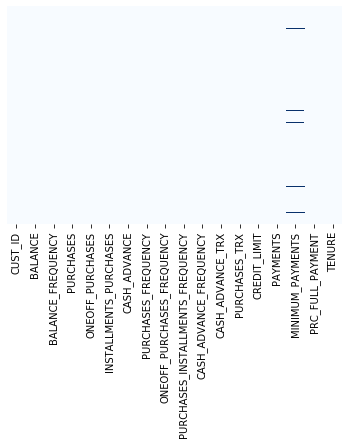

In [9]:
sns.heatmap(creditcard_df.isna(), yticklabels=False, cbar = False, cmap = 'Blues')

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### 3.3 Fill missing values with mean

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditcard_df.duplicated().sum()

0

#### 3.4 Drop meaningless column

In [15]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
n = len(creditcard_df.columns)
n

17

In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

#### 3.5 Variable distribution

 - distplot combines matplotlib.hist function with seaborn kdeplot()  
 - KDE plot represents the Kernel Density Estimate  
 - KDE is used for visualizing the probability density of a continuous variable.  
 - KDE demonstrates the probability density at different values in a continous variable.  

#### Interesting findings: 

- For 'Balance', most customers are around 1500 
- For 'Balance Frequency', most customers are near 1, indicating they makes purchase frequently  
- For 'Purchases Fruqnecy', there are 2 distinct groups of customers, one purchases least often, the other frequently  
- For 'Prc_Full_payment', most customer pay 0 to 0.2 
- For 'Tenure', most customers are ~11 years tenure
- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
- Credit limit average is around $4500

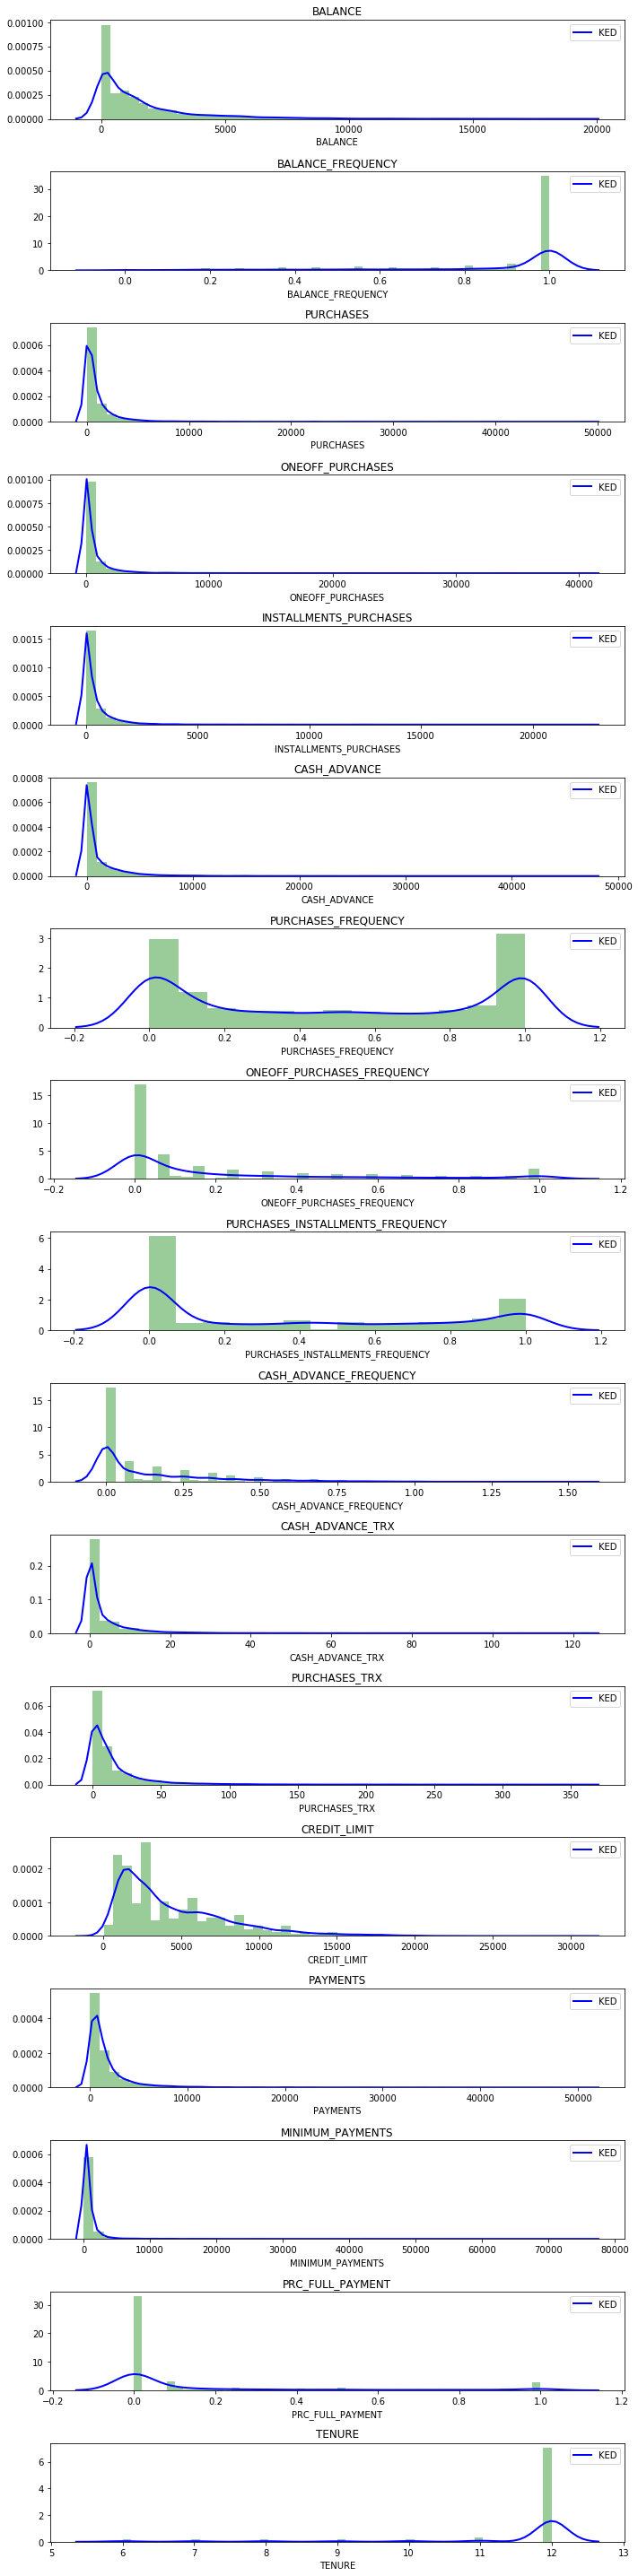

In [19]:
plt.figure(figsize = (10, 40))
for i in range(len(creditcard_df.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KED'}, hist_kws={'color': 'g'})
#     start, end = ax.get_xlim()
#     ax.xaxis.set_ticks(np.arange(start, end, 10))
#     ax.set_xticks(minor = True)
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

#### 3.6 Correlation analysis

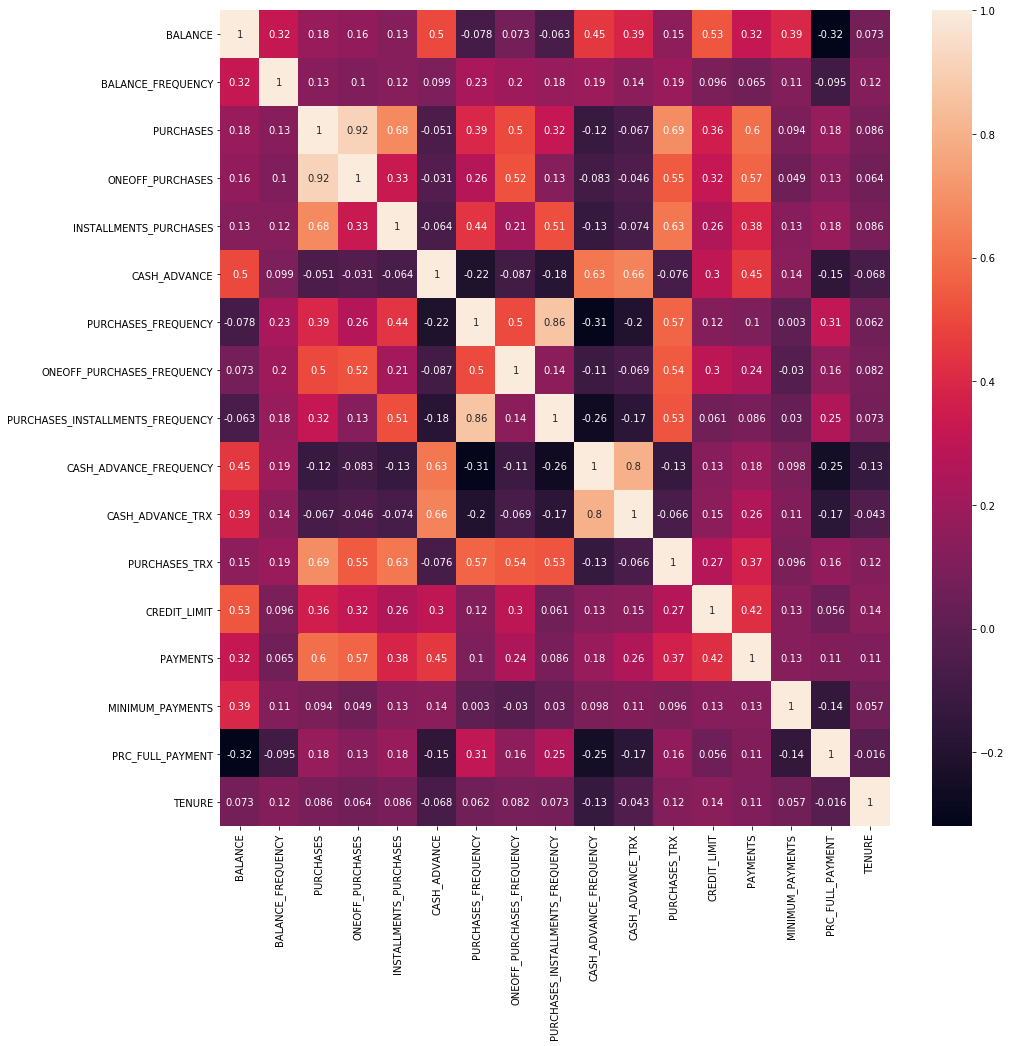

In [20]:
correlation = creditcard_df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation, annot = True)

### 4. K means clustering

#### 4.1 Find the optimal number of clusters

In [22]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    #--apply K means and with different amount of cluster
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

##### take K=8 as indicated below

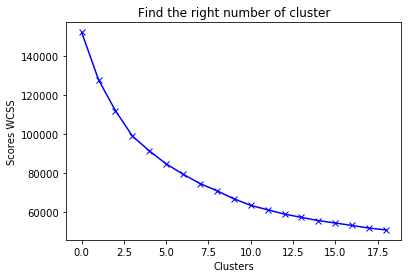

In [25]:
plt.plot(score_1, 'bx-')
plt.title('Find the right number of cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

#### 4.2 Apply K-means with all features

In [26]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(creditcard_df_scaled)


In [27]:
labels

array([1, 4, 0, ..., 6, 6, 6])

In [28]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [29]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


#### 4.3 Visualize various clusters

cluster 4 features: highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
    
  First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%  
    
Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
 Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

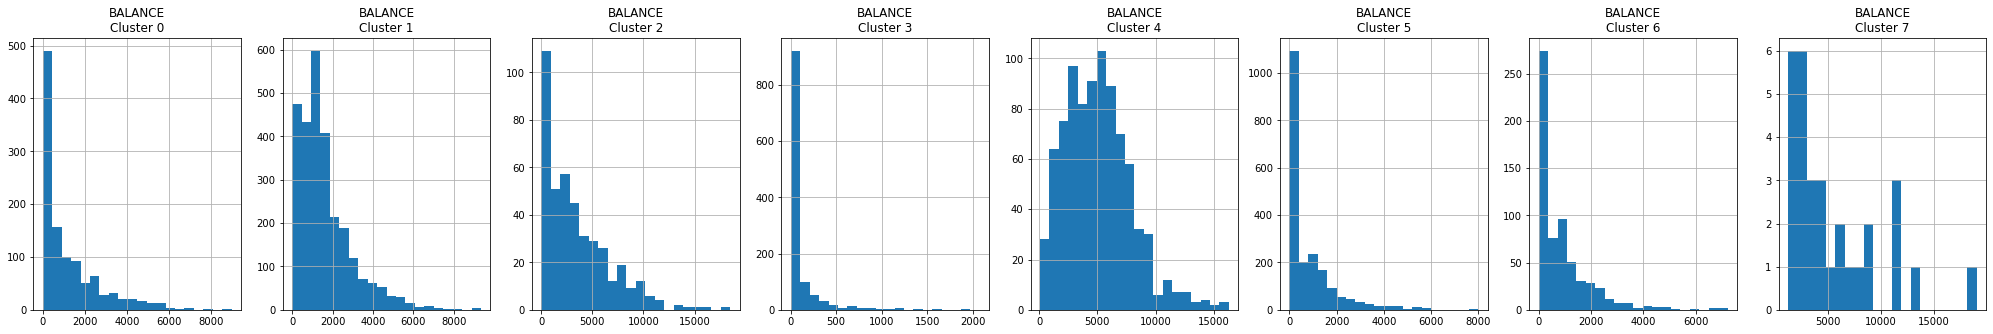

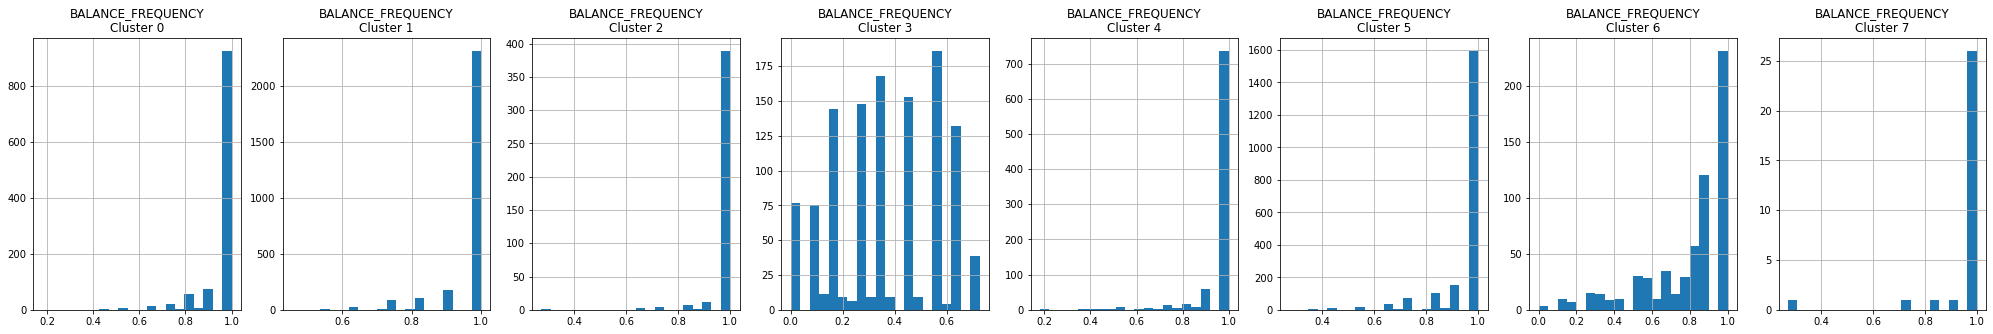

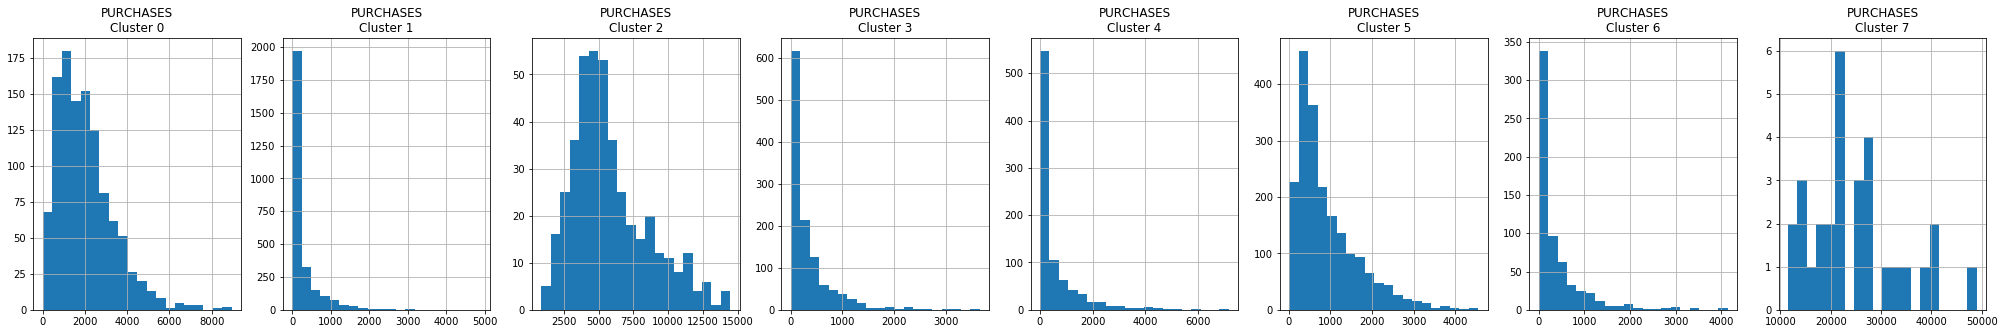

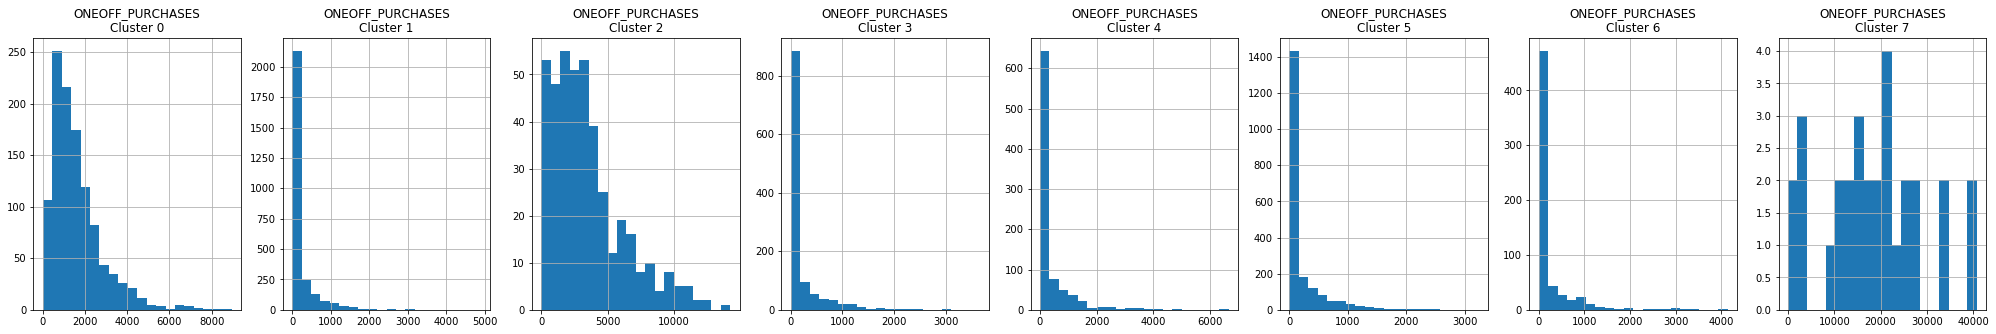

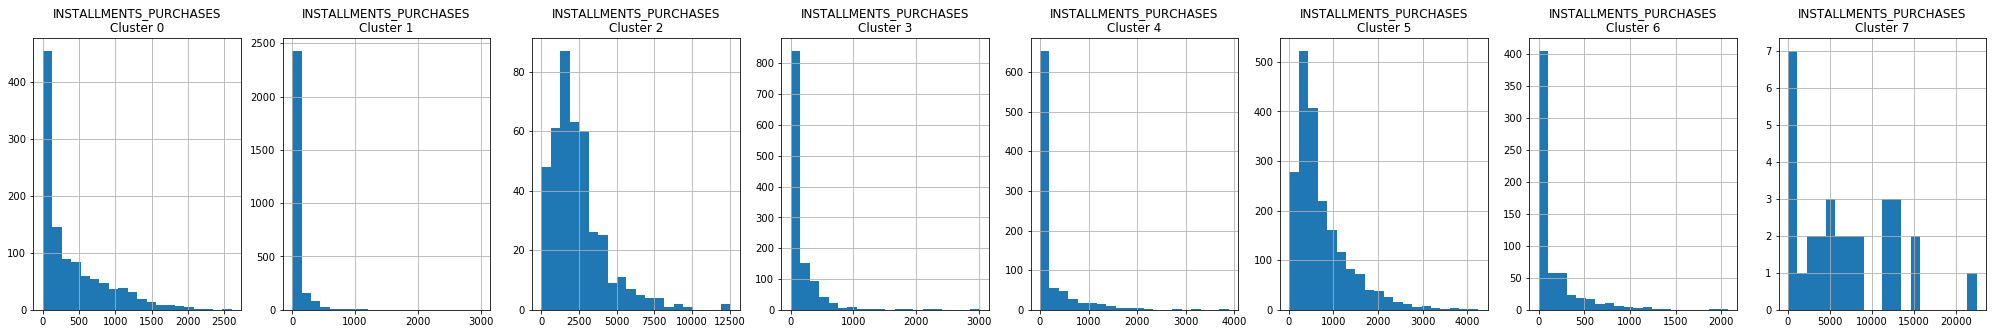

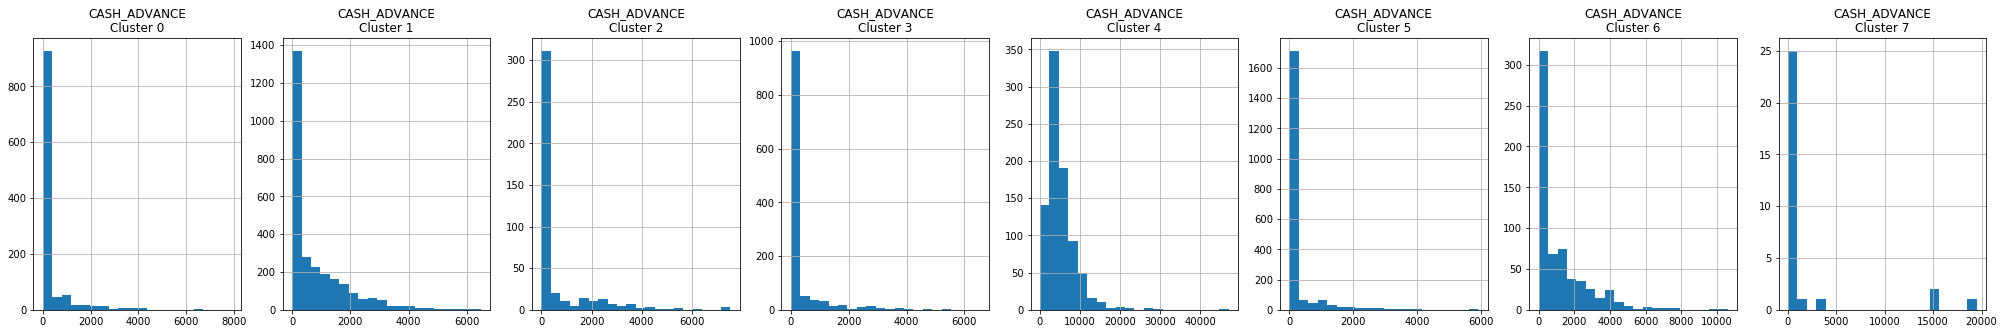

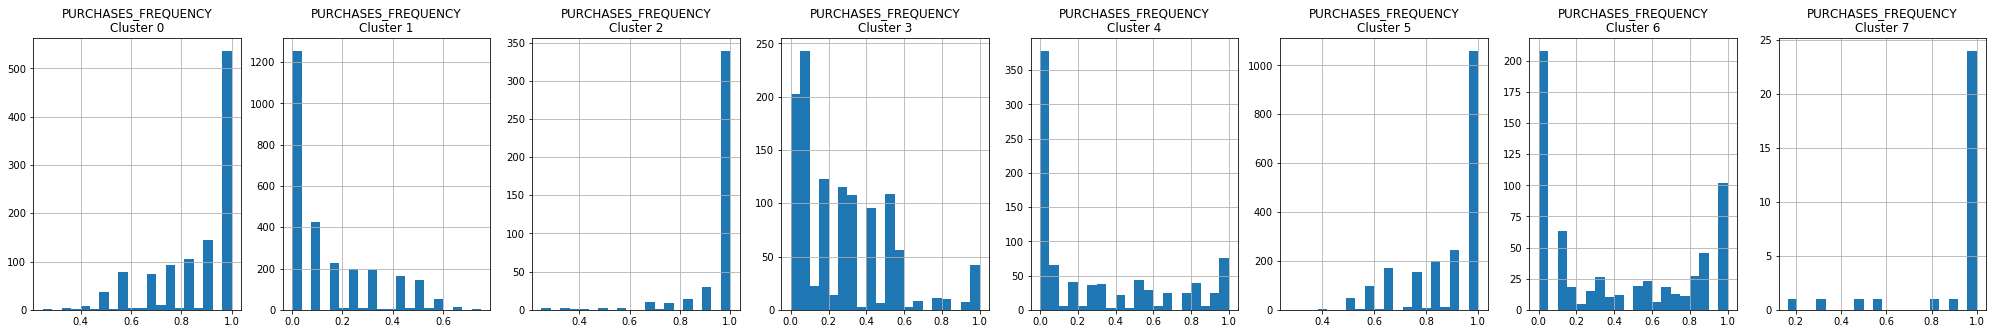

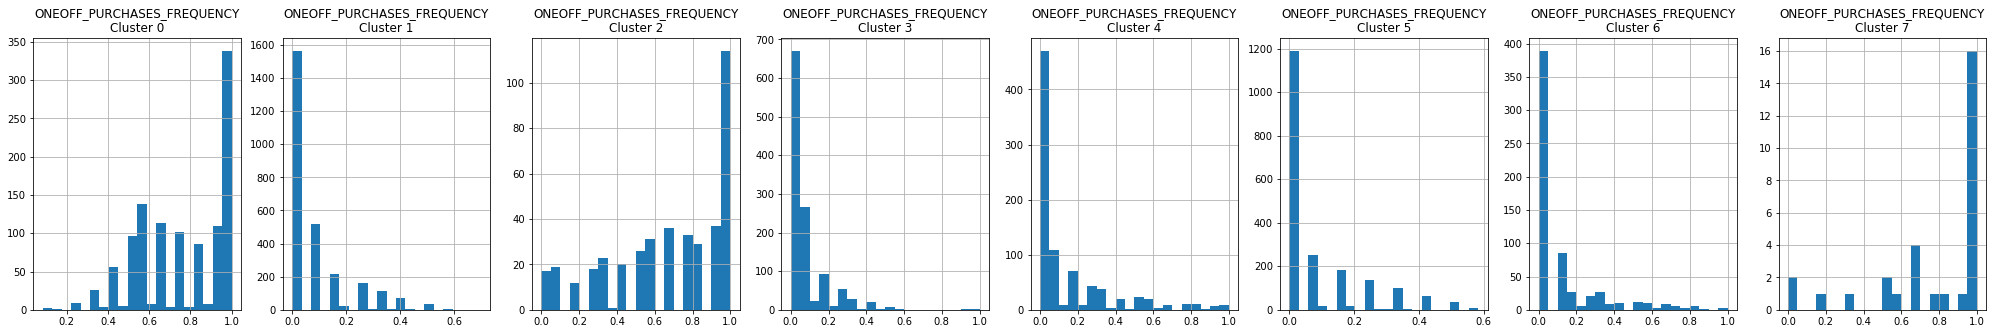

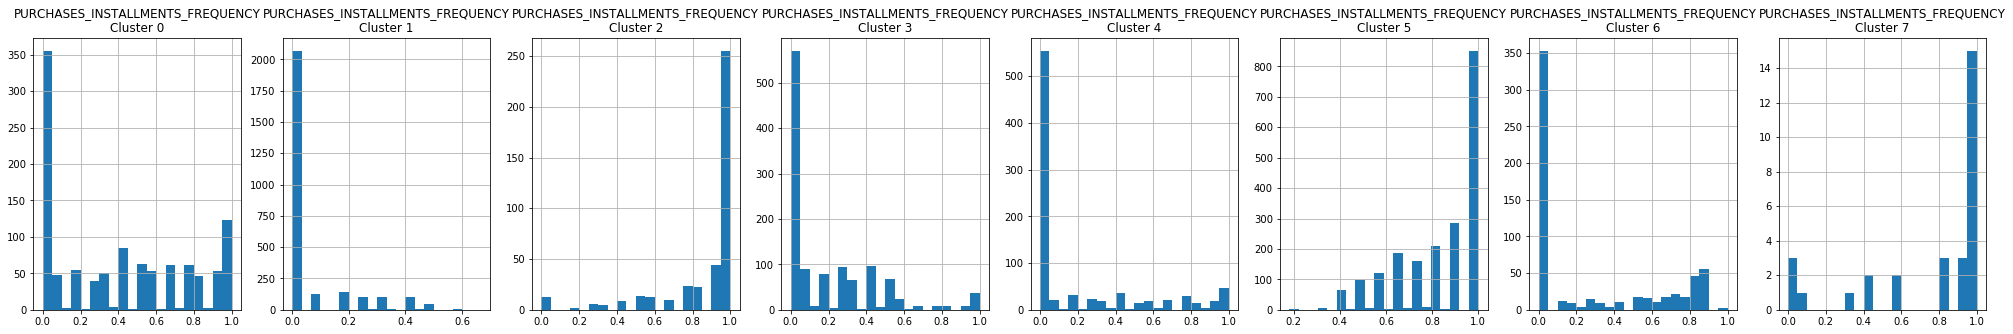

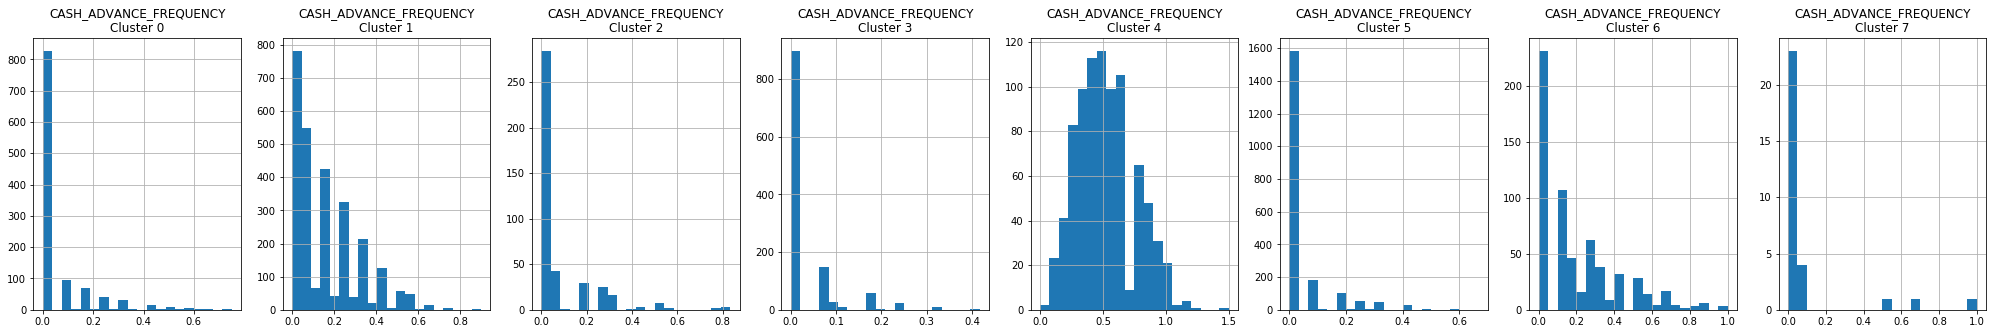

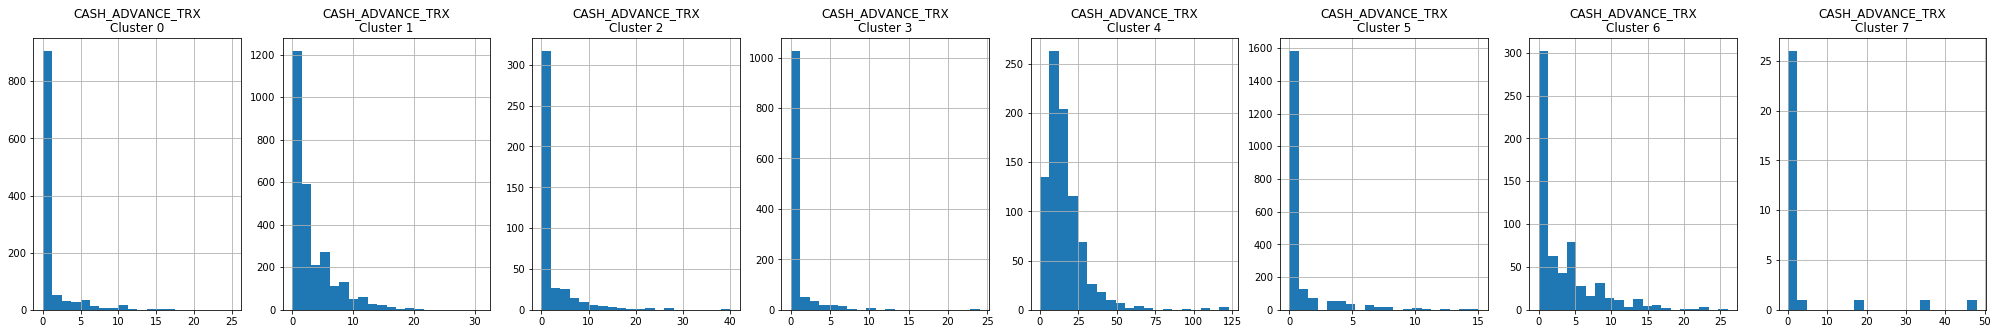

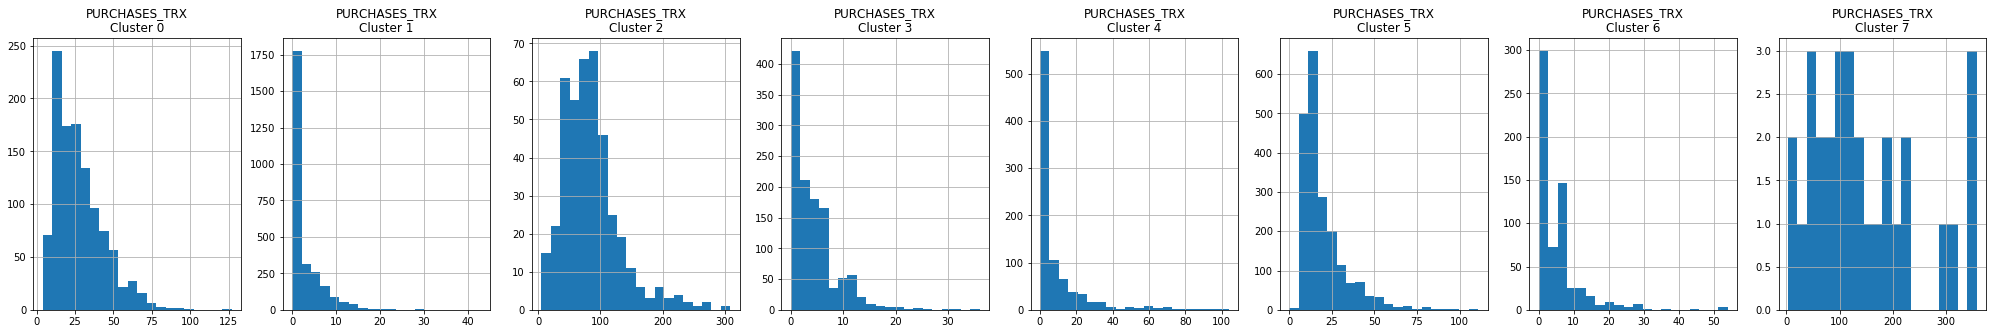

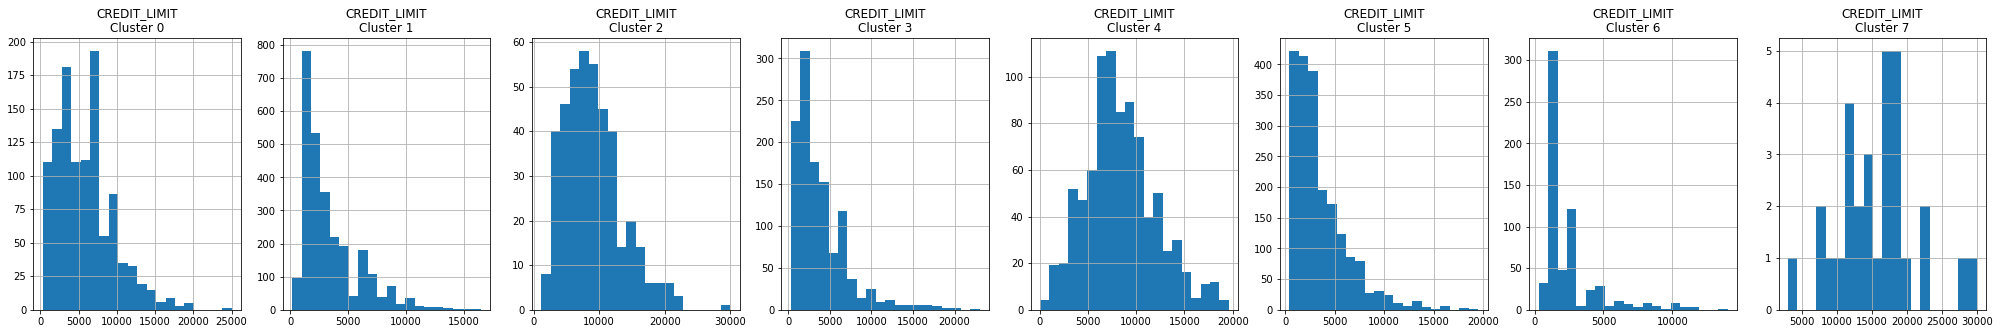

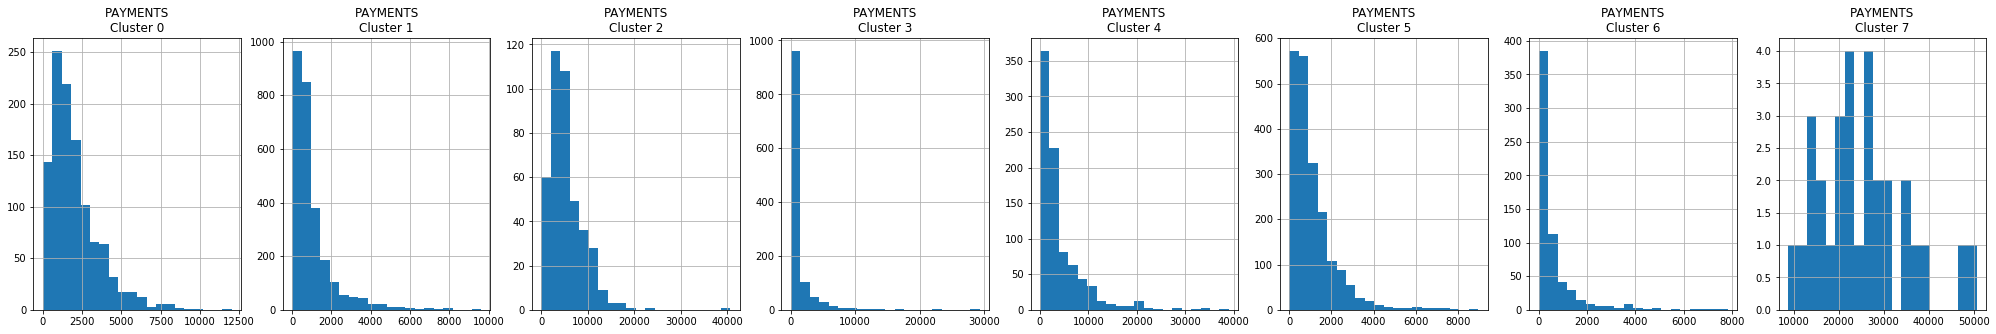

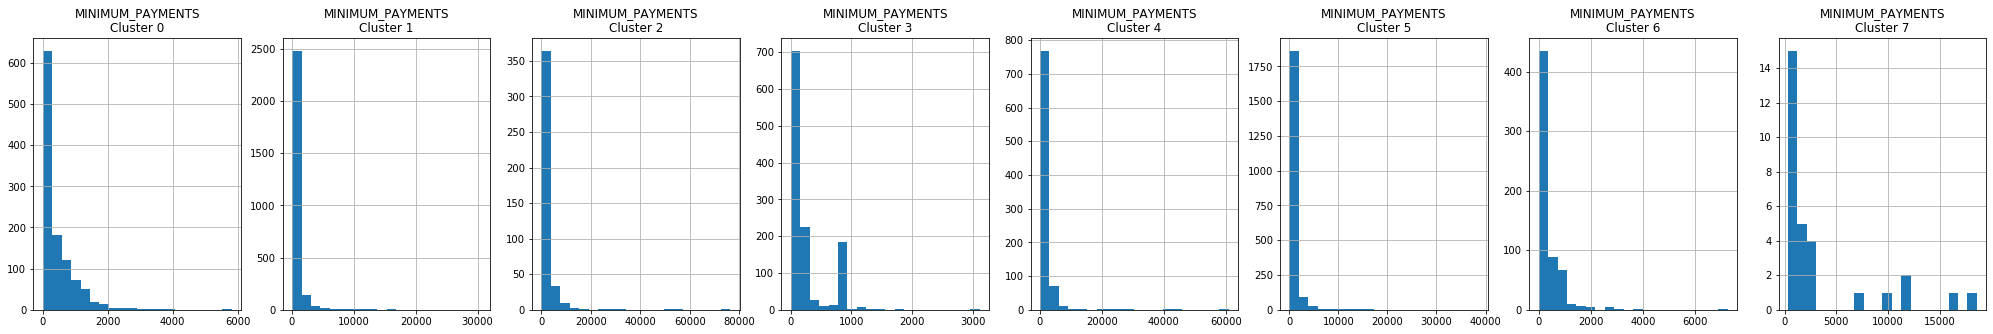

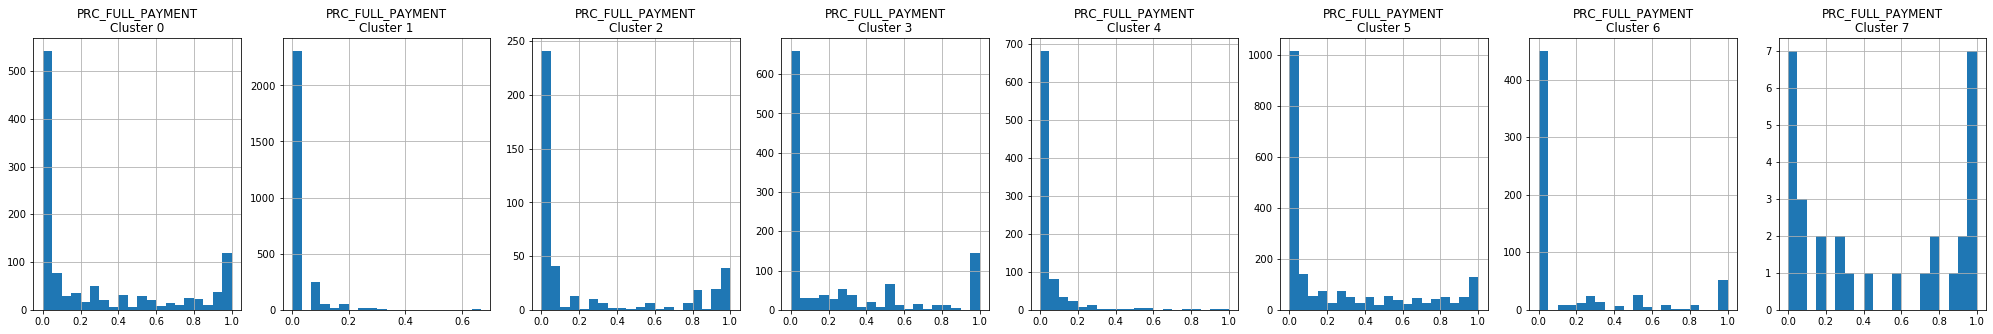

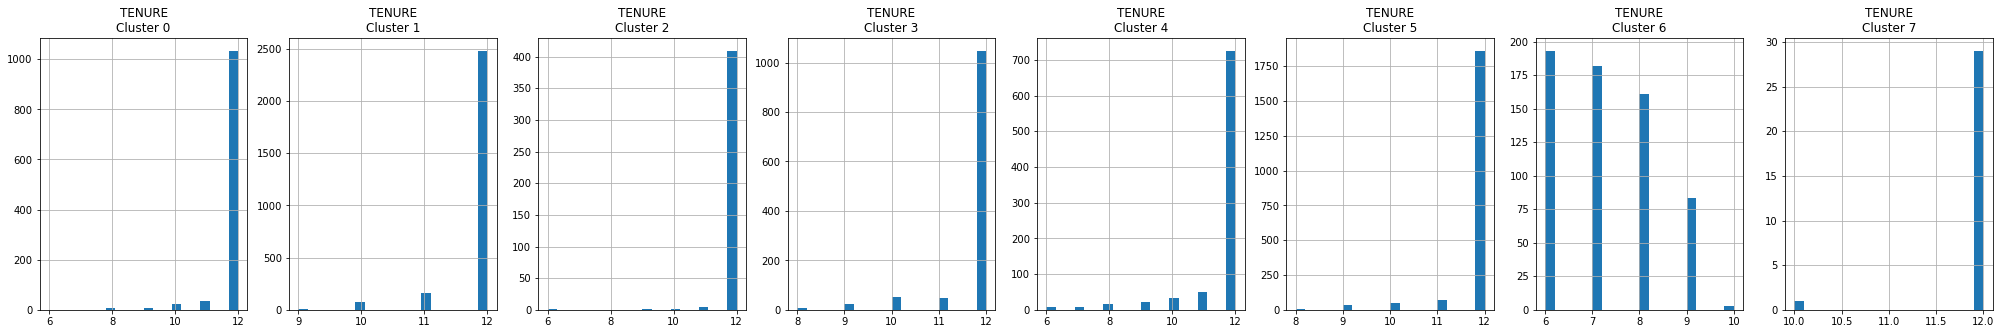

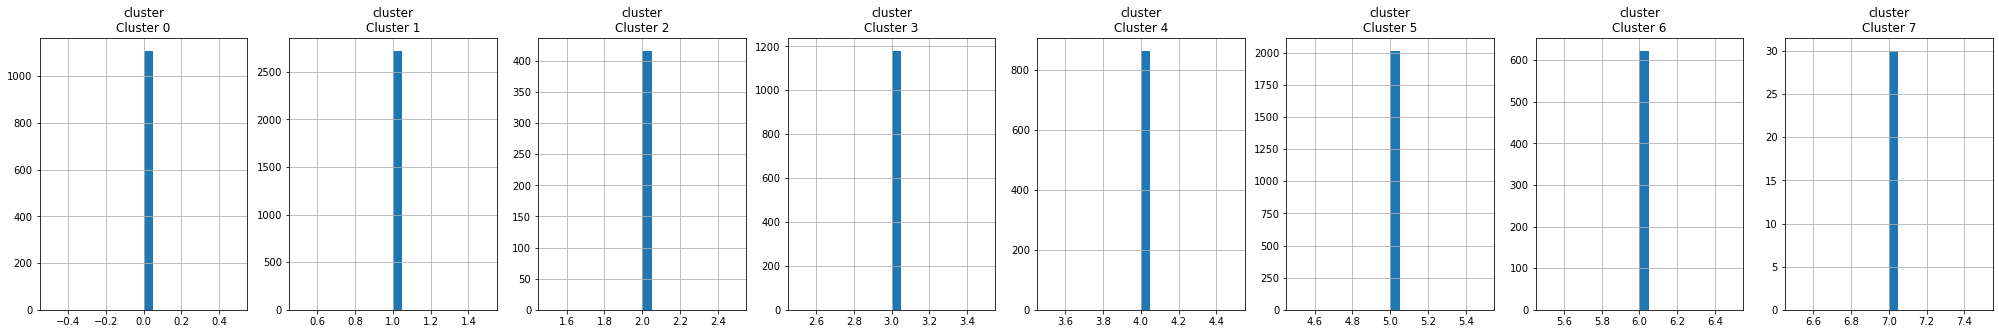

In [30]:
#--each row of figures represents feature distribution for each cluster-----#
for i in creditcard_df_cluster.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[ creditcard_df_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

### 5. Principle component analysis

#### 5.1 Compress to 2 vars

In [31]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221998, -1.07645587],
       [-1.13829343,  2.50646233],
       [ 0.96968385, -0.38351782],
       ...,
       [-0.92620388, -1.81078715],
       [-2.33655196, -0.65796581],
       [-0.55642257, -0.40045768]])

In [32]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [33]:
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076456
1,-1.138293,2.506462
2,0.969684,-0.383518
3,-0.873627,0.043157
4,-1.599434,-0.688583


#### 5.2 Visualize clsutering

In [34]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

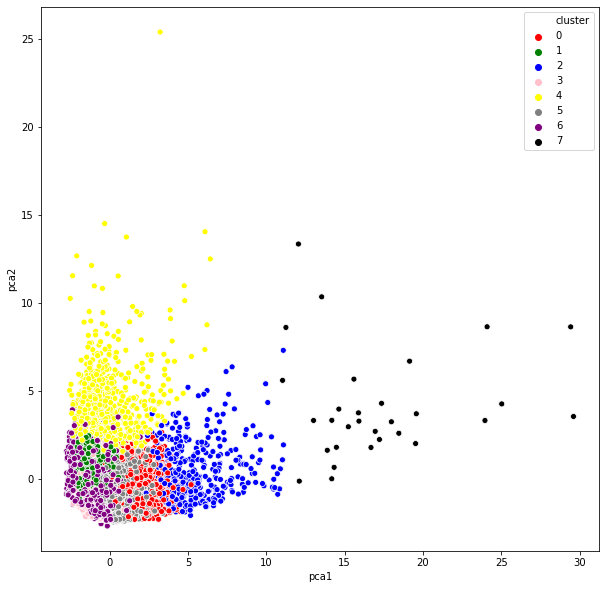

In [35]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

### 6. Autoencoder

 - Autoencoder a type of nn to perform data encoding  
 - Unsupervised learning with encoding and decoding
 - fit the model with the same input and output
 - Adding a bottle neck in the network
 - Work well for correlated data 

In [36]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


#### 6.1 Create model

In [37]:
input_df = Input( shape = (17, ))

x = Dense(7, activation = 'relu')(input_df)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
creditcard_df_scaled.shape

(8950, 17)

#### 6.2 Fit autoencoder

In [39]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size= 120, epochs = 25, verbose = 1)



Epoch 1/25
8950/8950 [==============================] - 8s 924us/step - loss: 0.6084
Epoch 2/25
8950/8950 [==============================] - 7s 815us/step - loss: 0.3395 1s
Epoch 3/25
8950/8950 [==============================] - 7s 801us/step - loss: 0.2778
Epoch 4/25
8950/8950 [==============================] - 7s 751us/step - loss: 0.2451 0s - los
Epoch 5/25
8950/8950 [==============================] - 6s 722us/step - loss: 0.2200
Epoch 6/25
8950/8950 [==============================] - 7s 767us/step - loss: 0.2095
Epoch 7/25
8950/8950 [==============================] - 7s 783us/step - loss: 0.2012
Epoch 8/25
8950/8950 [==============================] - 7s 825us/step - loss: 0.1879
Epoch 9/25
8950/8950 [==============================] - 8s 911us/step - loss: 0.1776
Epoch 10/25
8950/8950 [==============================] - 8s 855us/step - loss: 0.1655
Epoch 11/25
8950/8950 [==============================] - 7s 786us/step - loss: 0.1625
Epoch 12/25
8950/8950 [==========================

In [40]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 17)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              22000     
__________

#### 6.3 Feature compression

In [41]:
pred = encoder.predict(creditcard_df_scaled)

In [42]:
pred.shape

(8950, 10)

#### 6.3.1 Find the optimal cluster number

In [43]:
score_2 = []
range_values = range(1, 20)
for i in range_values:
    #--apply K means and with different amount of cluster
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)

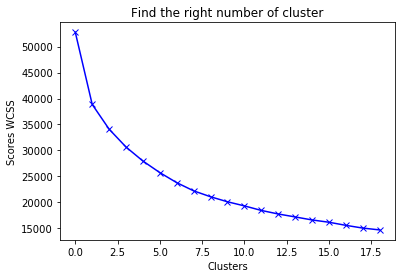

In [44]:
plt.plot(score_2, 'bx-')
plt.title('Find the right number of cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

#### 6.3.2 Apply K-means

In [45]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(creditcard_df_scaled)

##### compare score1 and score2

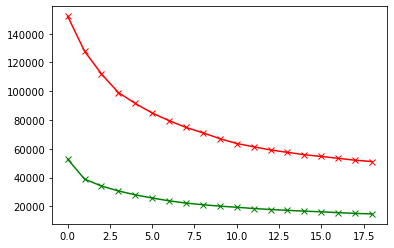

In [46]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(score_2, 'bx-', color = 'g')

##### take K=4

In [47]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [48]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


##### apply PCA

In [49]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])

In [50]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.216417,-0.236461,0
1,0.906516,-0.815347,2
2,0.951768,0.019103,2
3,-1.039833,-0.122256,0
4,-1.286590,-0.137415,0


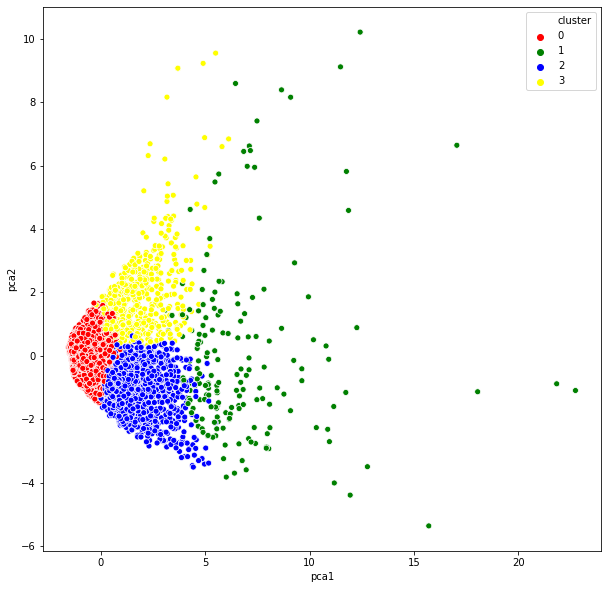

In [51]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow'])

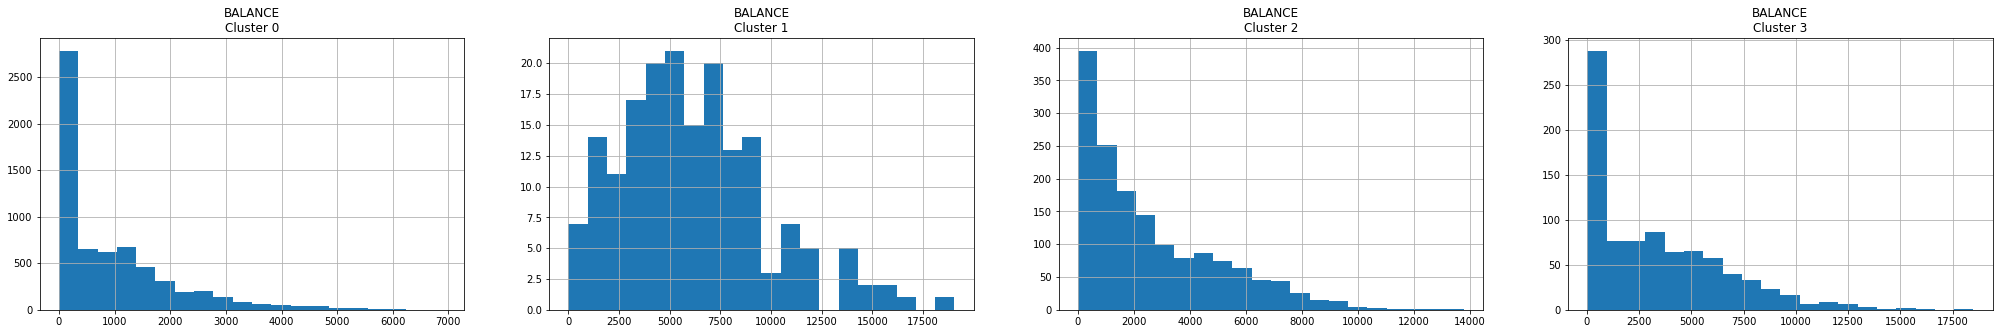

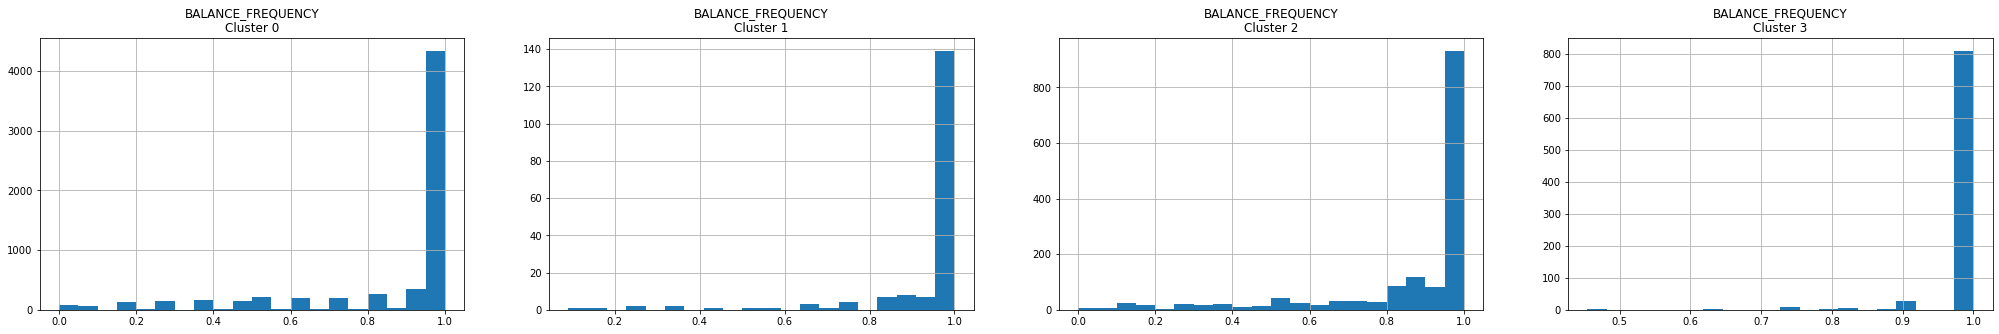

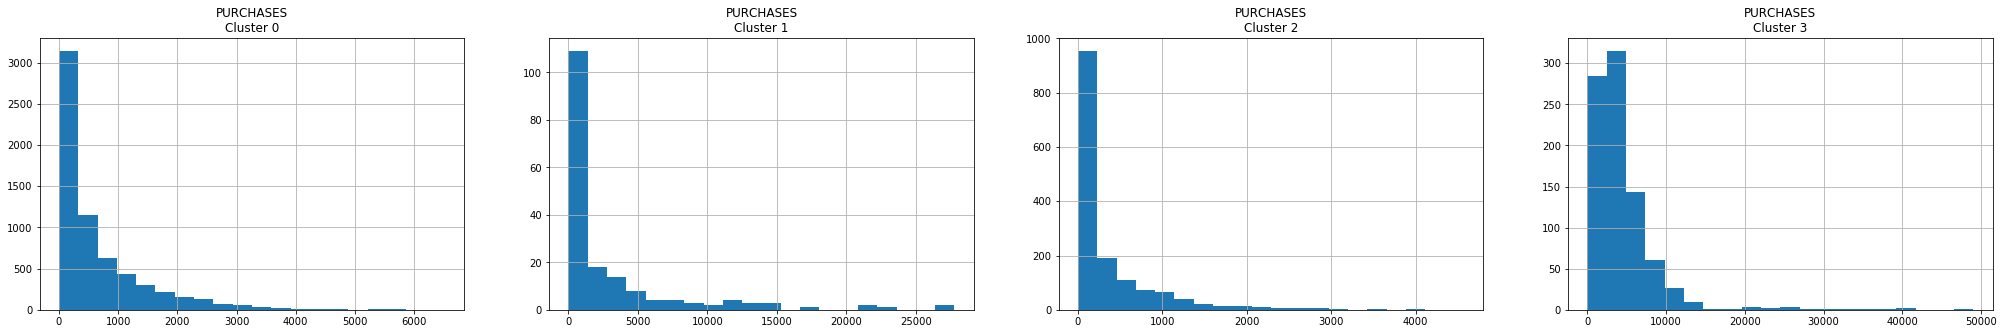

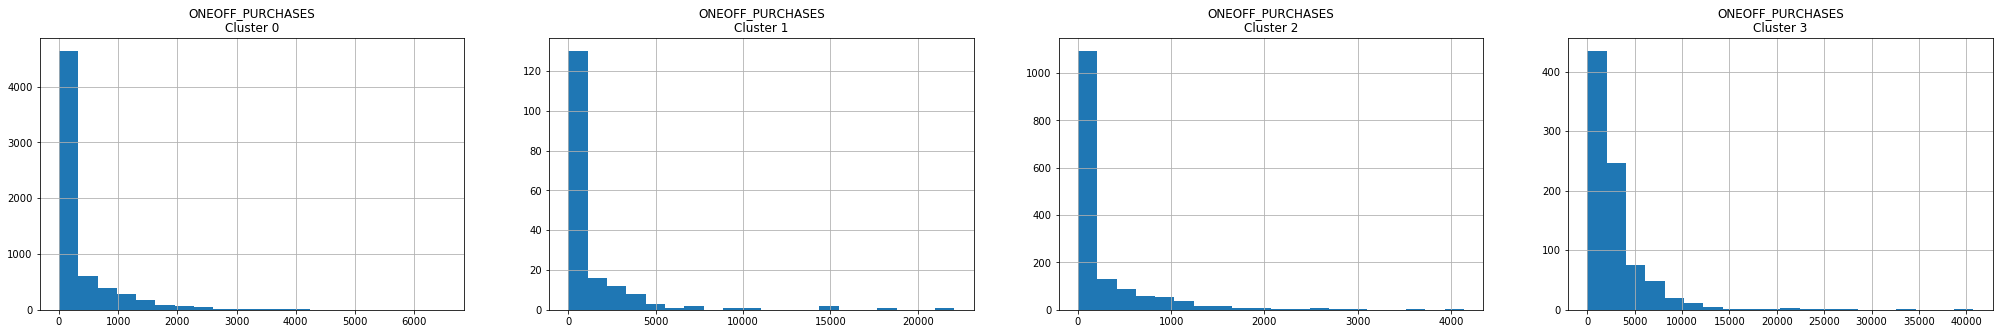

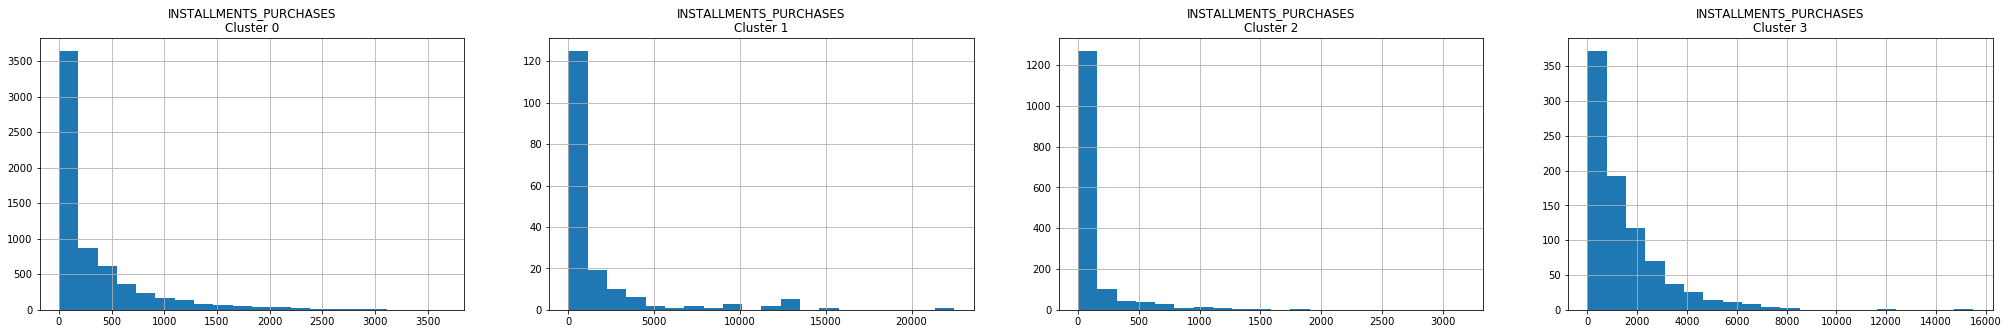

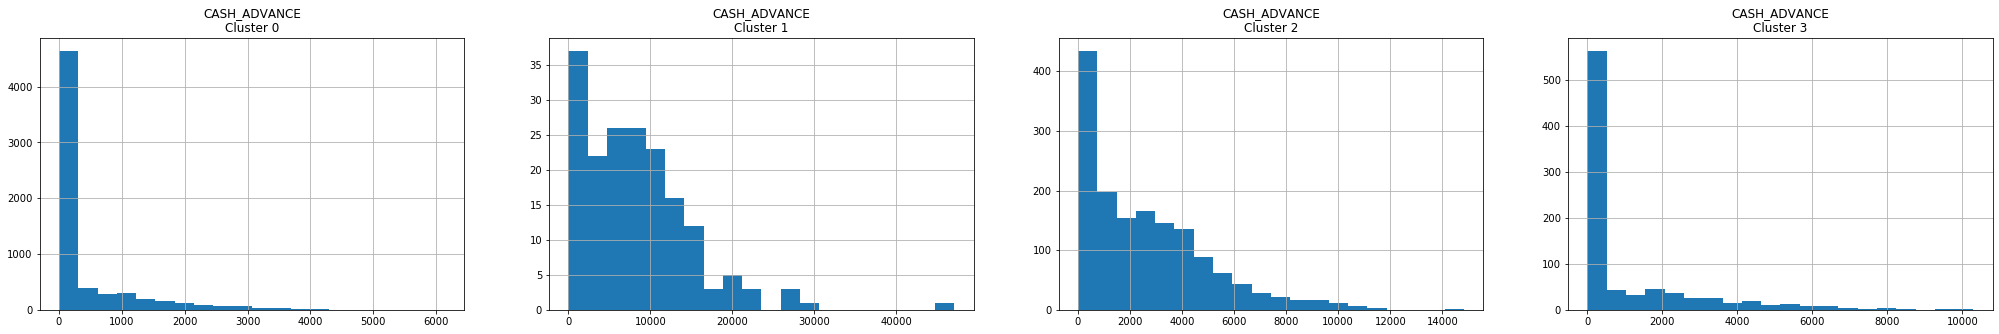

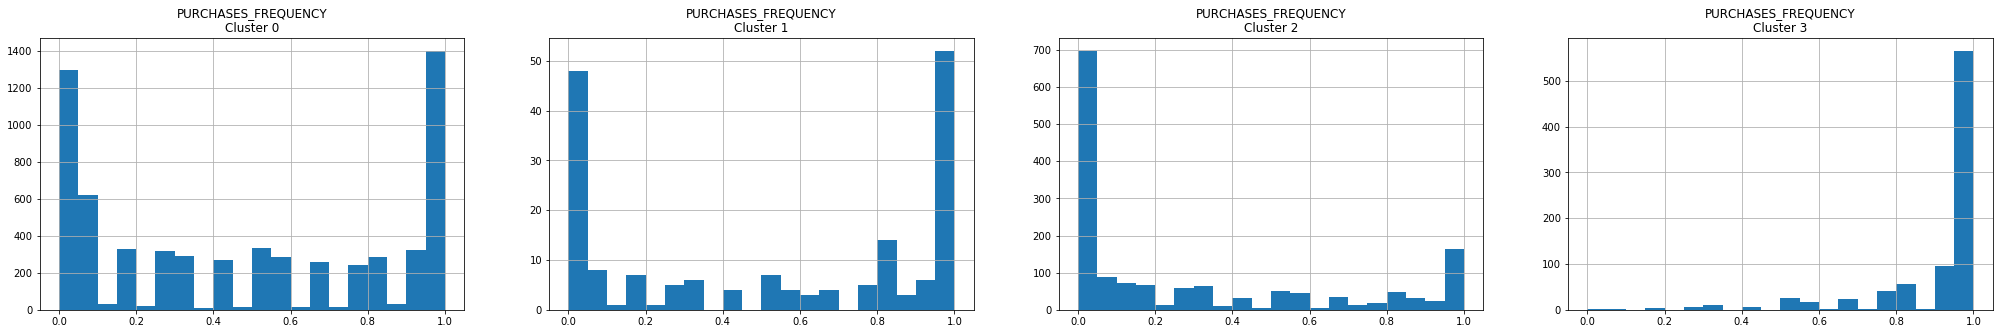

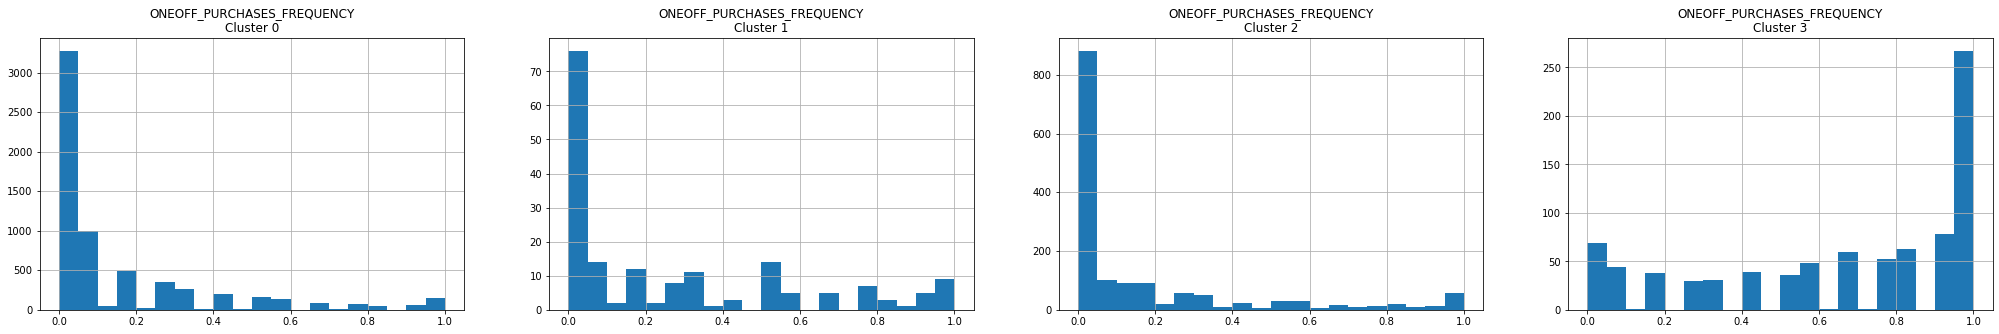

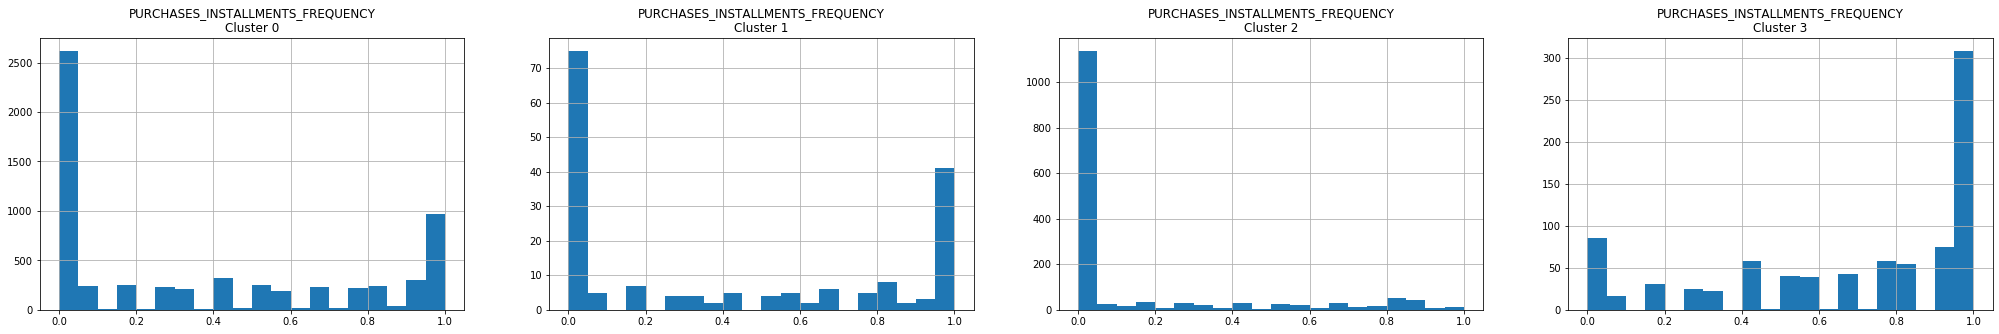

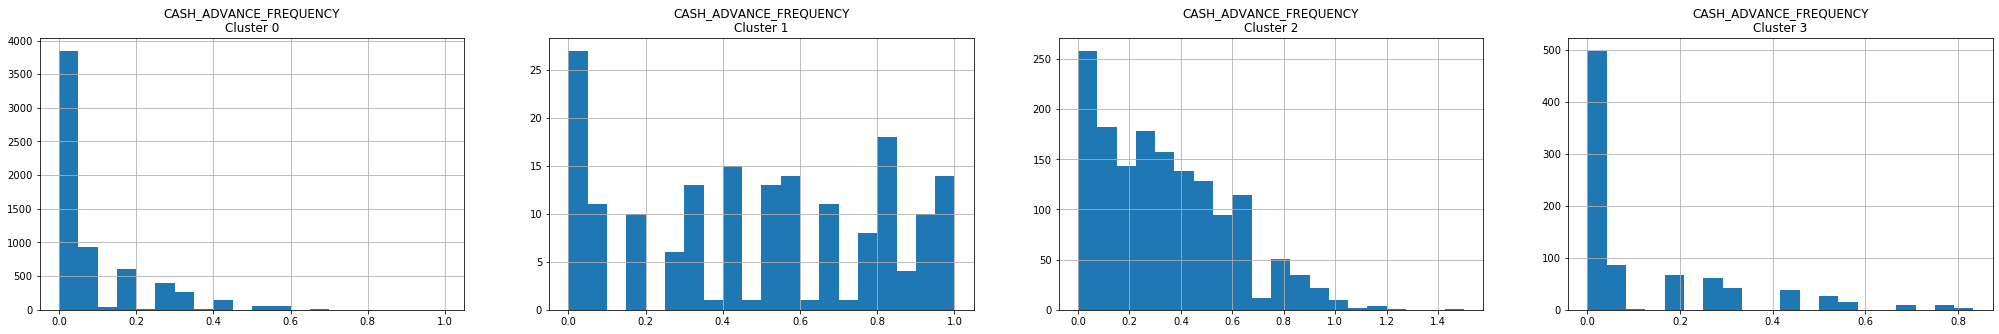

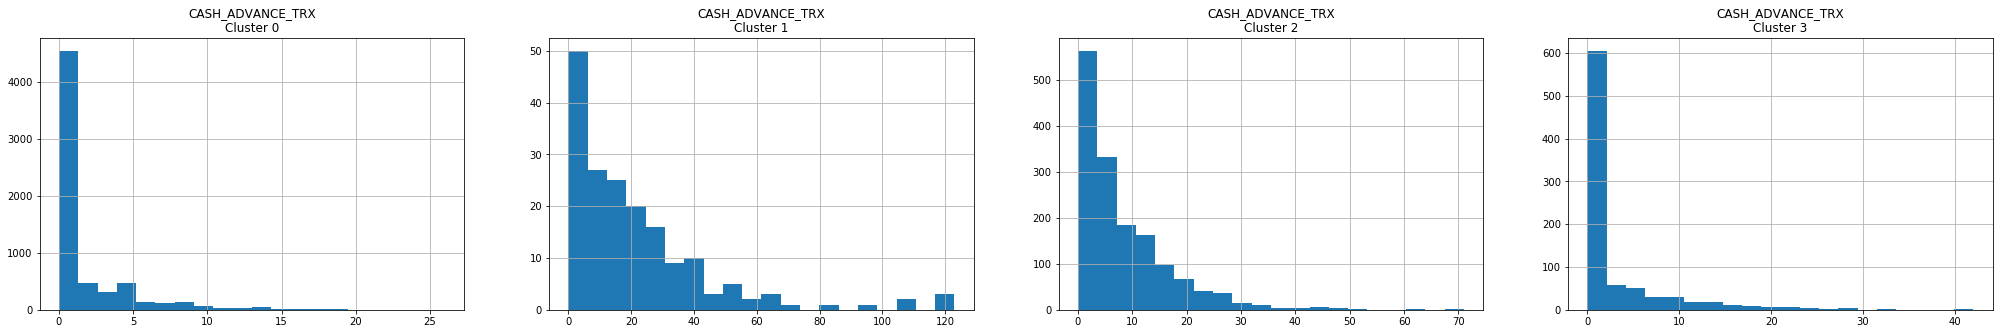

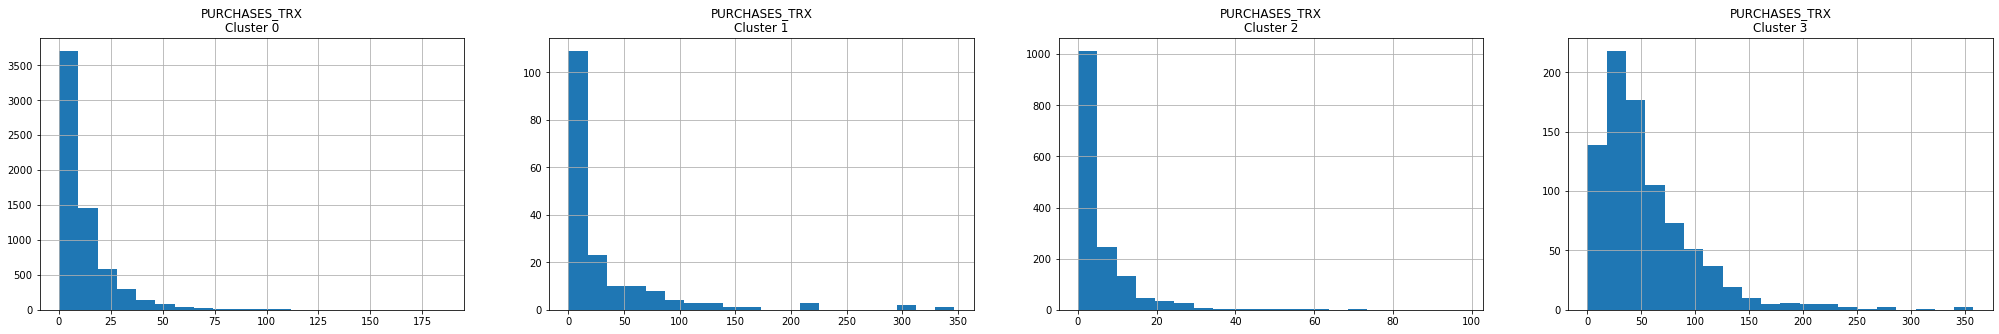

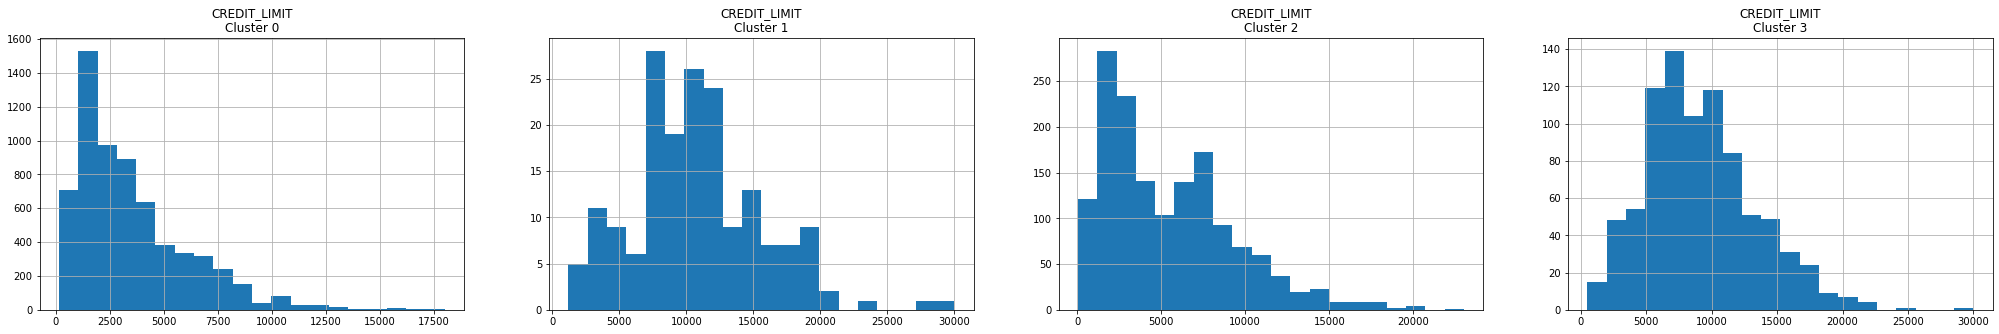

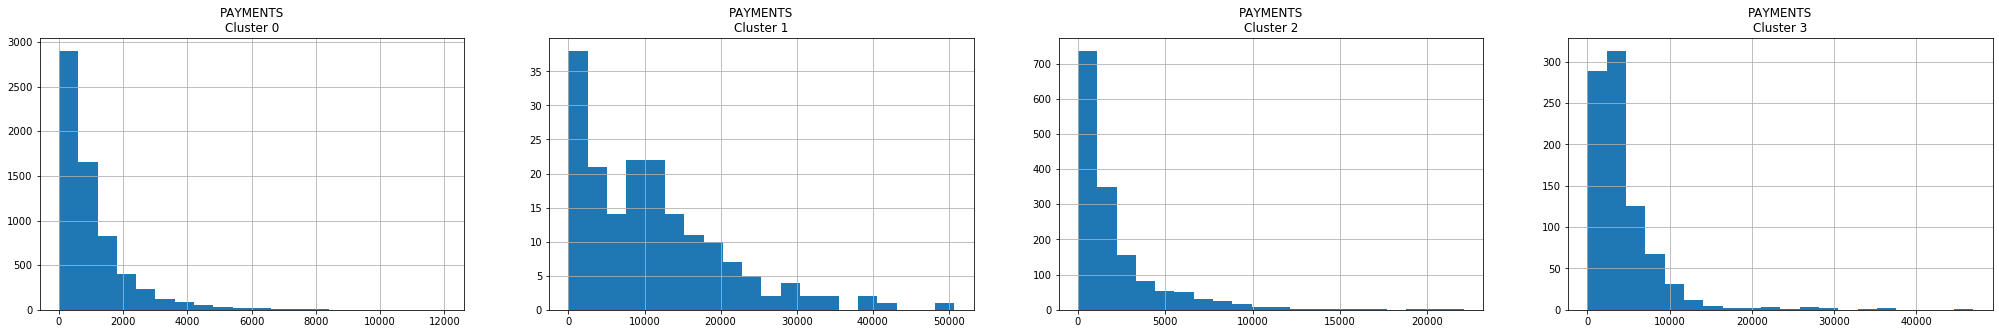

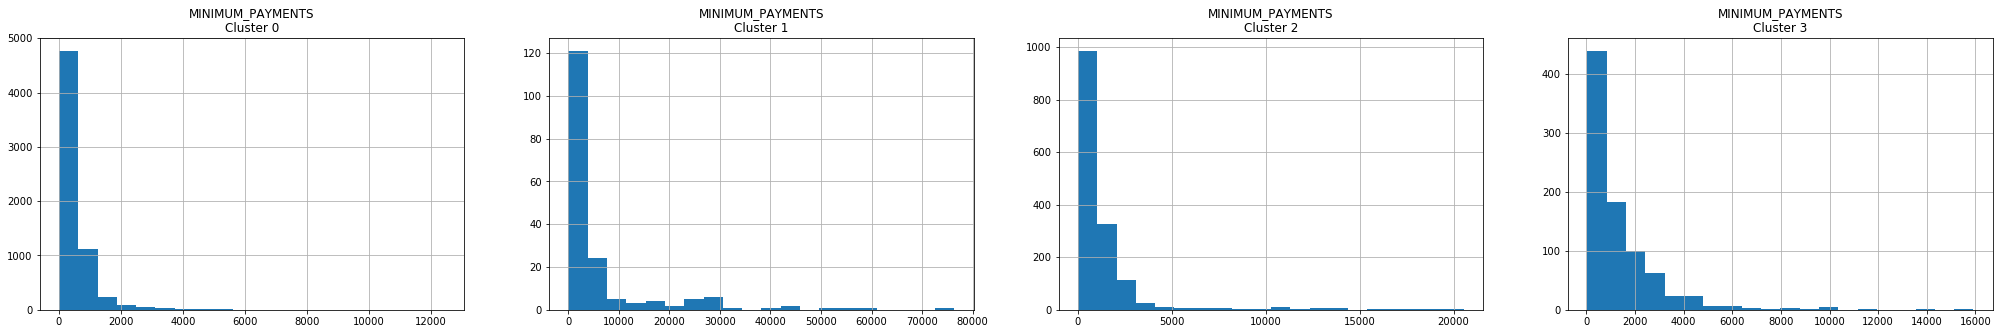

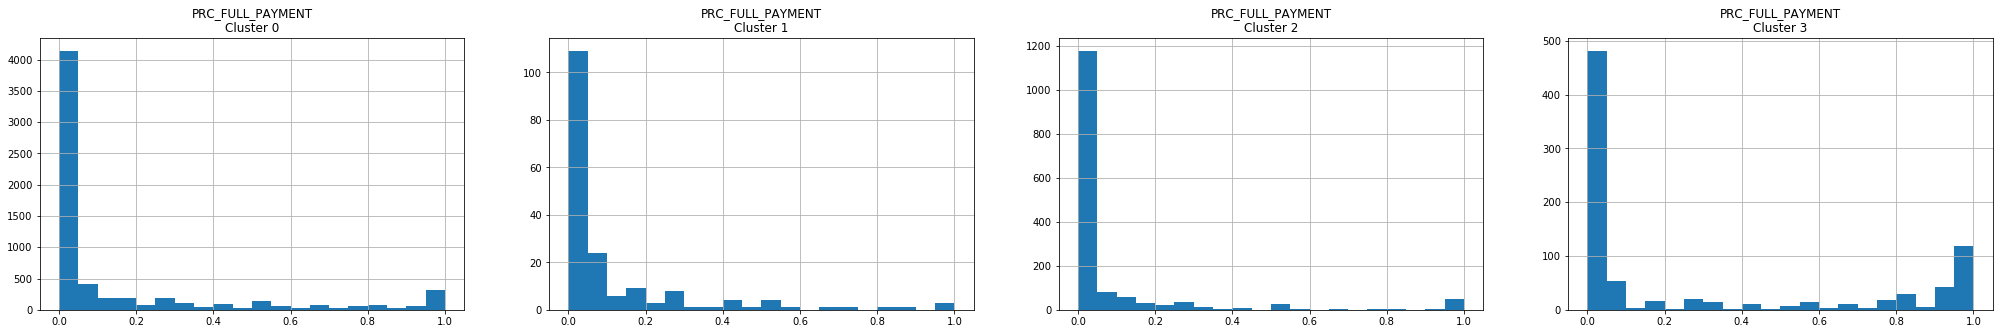

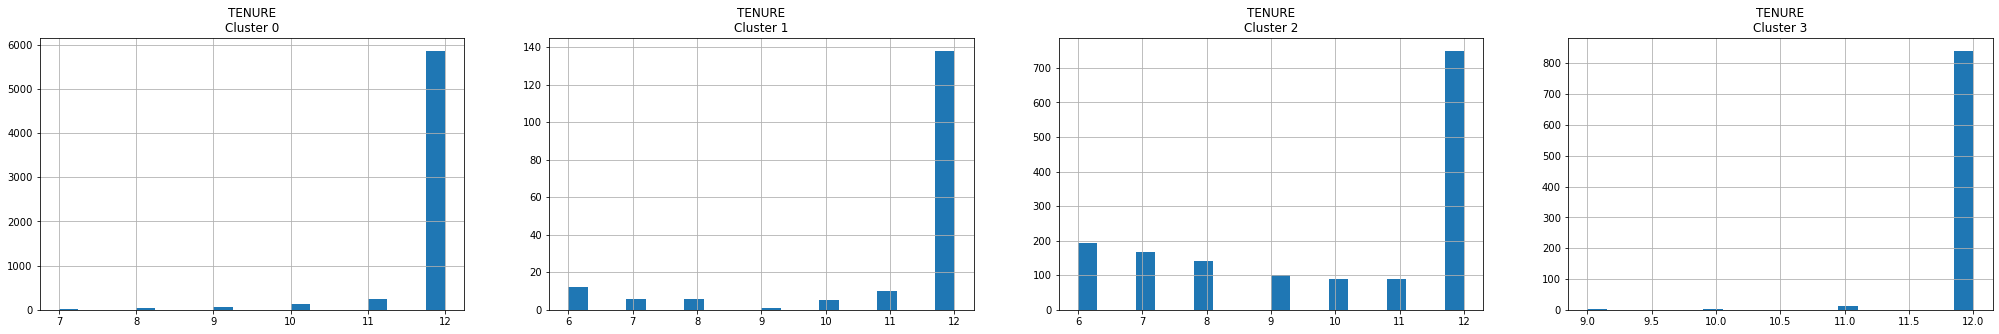

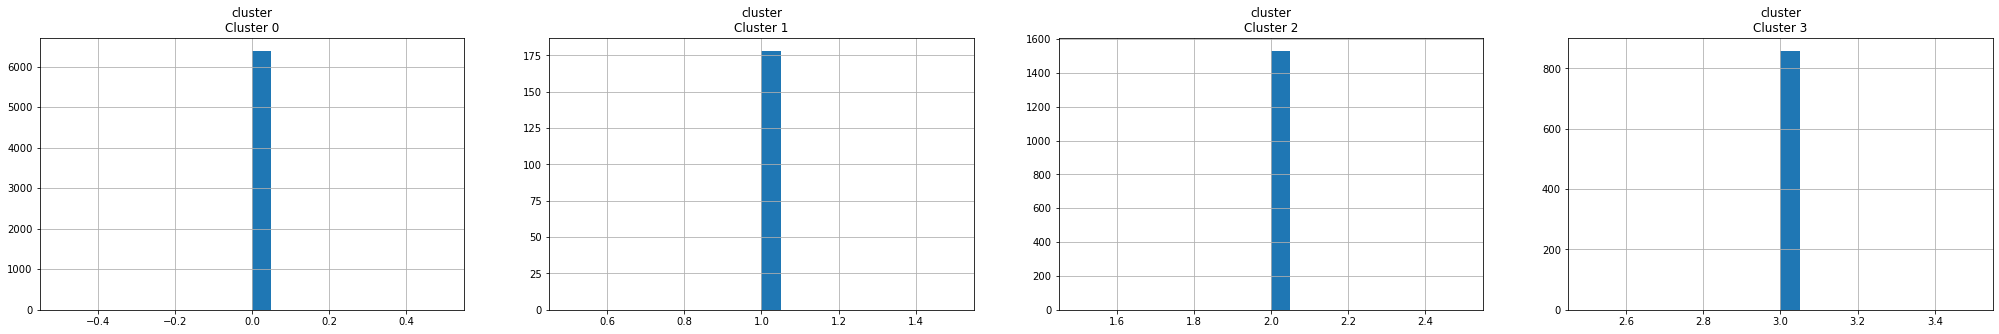

In [52]:
#--each row of figures represents feature distribution for each cluster-----#
for i in df_cluster_dr.columns:
    plt.figure(figsize = (35, 5))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = df_cluster_dr[ df_cluster_dr['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()